In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16  import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/gdrive/My Drive/chest_data_train_test_split/train'
valid_path = '/content/gdrive/My Drive/chest_data_train_test_split/test'


In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
# useful for getting number of classes
folders = glob('/content/gdrive/My Drive/chest_data_train_test_split/train/*')
print(len(folders))

2


In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
import tensorflow as tf
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/chest_data_train_test_split/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/gdrive/My Drive/chest_data_train_test_split/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 78 images belonging to 2 classes.
Found 84 images belonging to 2 classes.


In [ ]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
3/3 [==============================] - 49s 16s/step - loss: 1.1335 - accuracy: 0.5641 - val_loss: 1.2066 - val_accuracy: 0.8690
Epoch 2/10
3/3 [==============================] - 7s 2s/step - loss: 1.3537 - accuracy: 0.8205 - val_loss: 0.8271 - val_accuracy: 0.8690
Epoch 3/10
3/3 [==============================] - 7s 2s/step - loss: 0.4895 - accuracy: 0.8333 - val_loss: 0.6301 - val_accuracy: 0.7024
Epoch 4/10
3/3 [==============================] - 7s 2s/step - loss: 0.6546 - accuracy: 0.6667 - val_loss: 0.4648 - val_accuracy: 0.8810
Epoch 5/10
3/3 [==============================] - 6s 2s/step - loss: 0.4517 - accuracy: 0.8333 - val_loss: 0.7744 - val_accuracy: 0.8690
Epoch 6/10
3/3 [==============================] - 7s 2s/step - loss: 0.5506 - accuracy: 0.8205 - val_loss: 0.6230 - val_accuracy: 0.8690
Epoch 7/10
3/3 [==============================] - 7s 2s/step - loss: 0.3006 - accuracy: 0.8846 - val

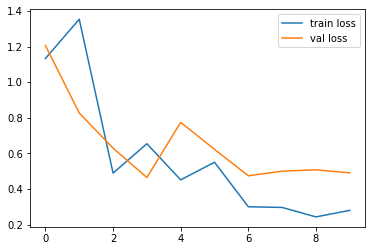

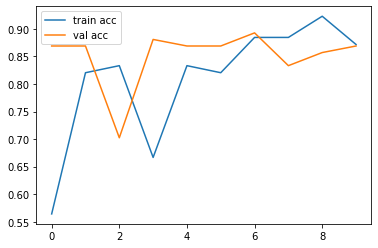

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
predictions = model.predict(test_set).argmax( axis=-1 ) 


In [ ]:
print(len(predictions))
#predictions.resize(357,refcheck=False)
print(len(predictions))

84
84


In [ ]:
print ( predictions )

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
#print(test_set)
print('F1_score : ',f1_score(test_set.classes,predictions,average='micro'))
print('sensitibity : ',metrics.recall_score(test_set.classes,predictions,average='micro'))

F1_score :  0.8452380952380952
sensitibity :  0.8452380952380952


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_set.classes, predictions))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        73
           1       0.00      0.00      0.00        11

    accuracy                           0.85        84
   macro avg       0.43      0.49      0.46        84
weighted avg       0.75      0.85      0.80        84



In [ ]:
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show() 

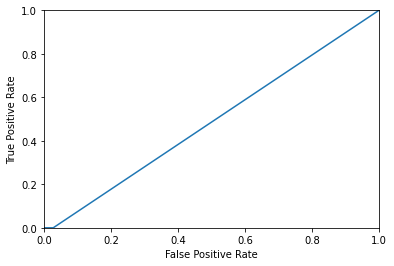

0.4863013698630137
-0.06062377612681656


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef

fpr , tpr , thresholds = roc_curve (test_set.classes,predictions)
plot_roc_curve (fpr,tpr)
auc_score=roc_auc_score(test_set.classes,predictions) 
print(auc_score) 
print(matthews_corrcoef(test_set.classes,predictions))